In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\ToyotaCorolla - MLR.csv")

In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
data.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
data.shape

(1436, 11)

In [7]:
data.size

15796

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [9]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [10]:
data.value_counts('Cylinders')

Cylinders
4    1436
Name: count, dtype: int64

In [11]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [13]:
data[data.duplicated]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [14]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

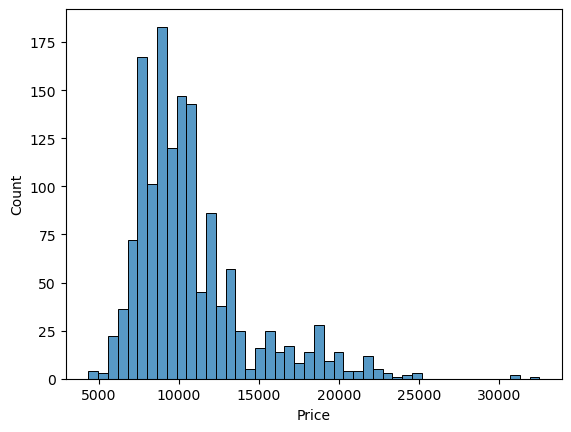

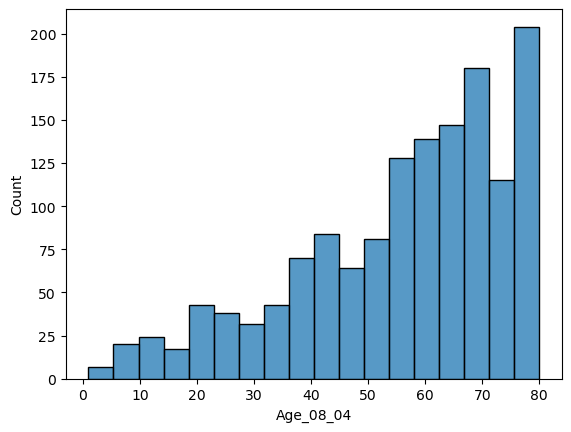

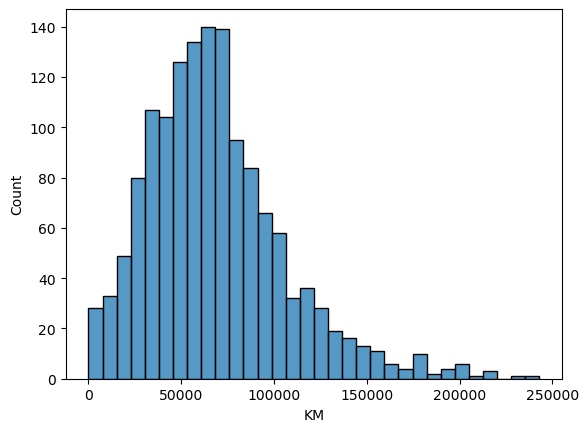

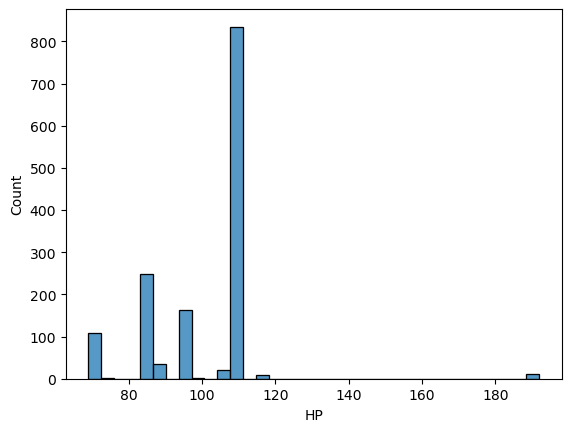

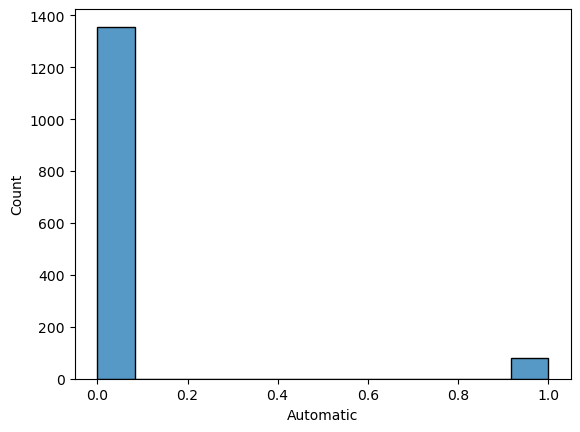

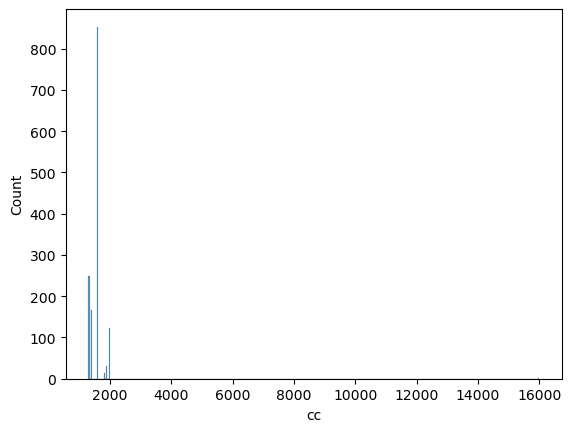

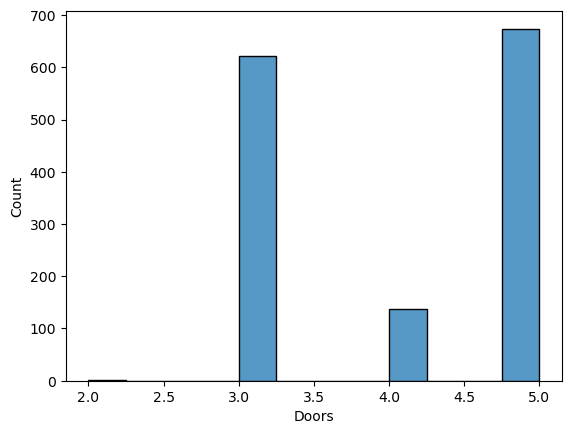

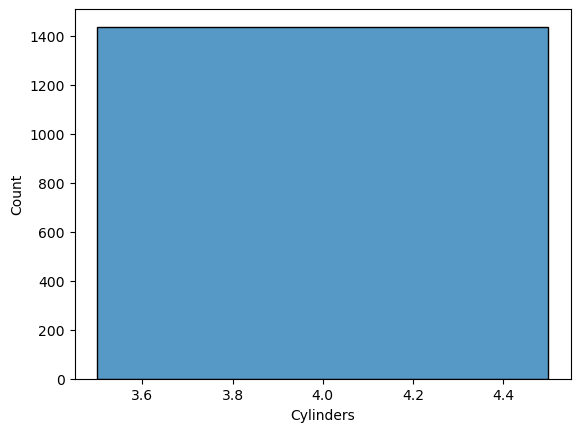

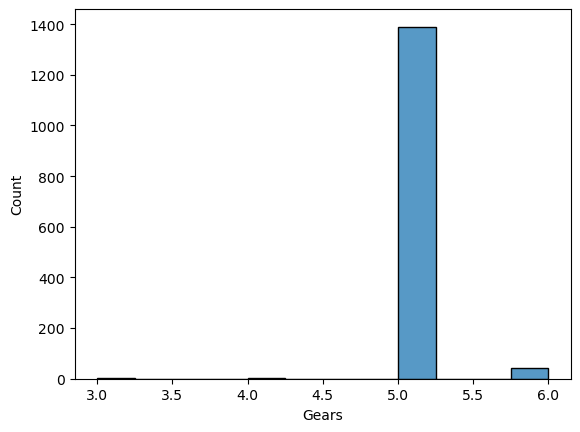

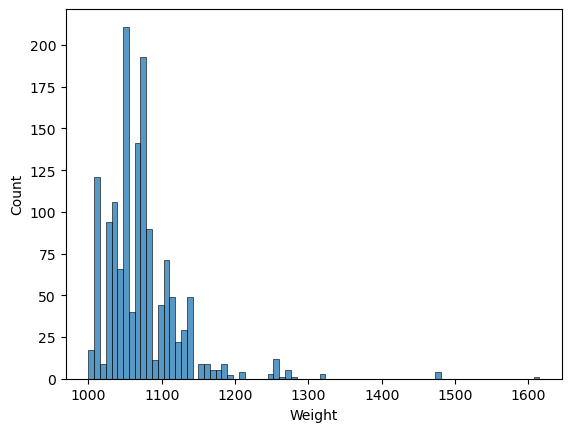

In [15]:
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data,x=i)
    plt.show()

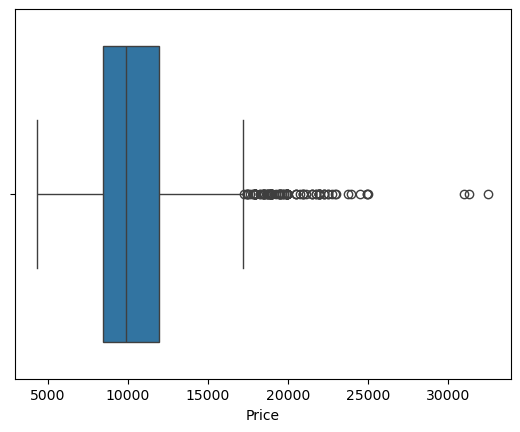

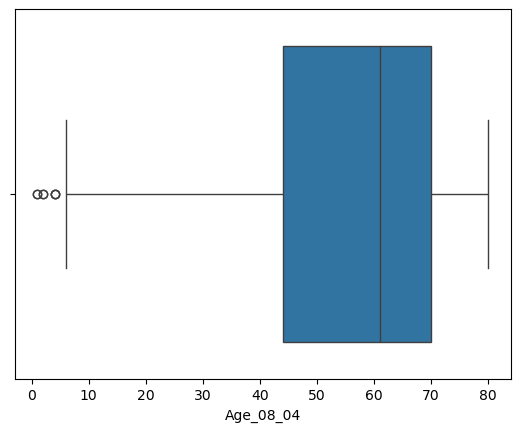

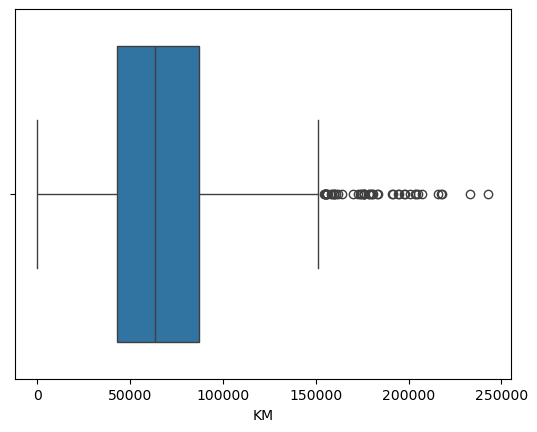

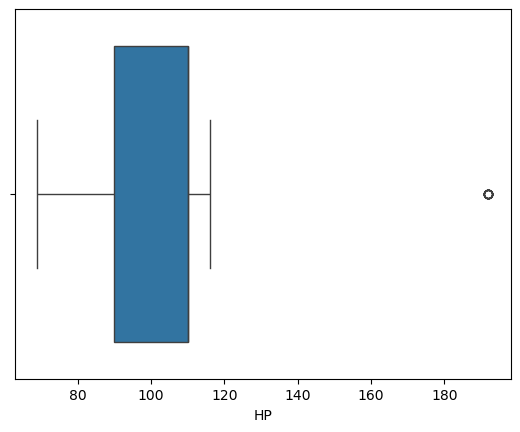

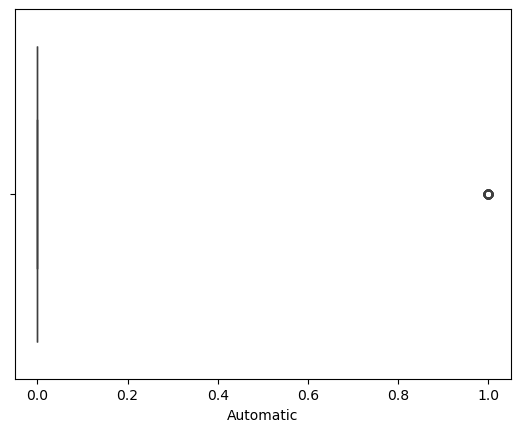

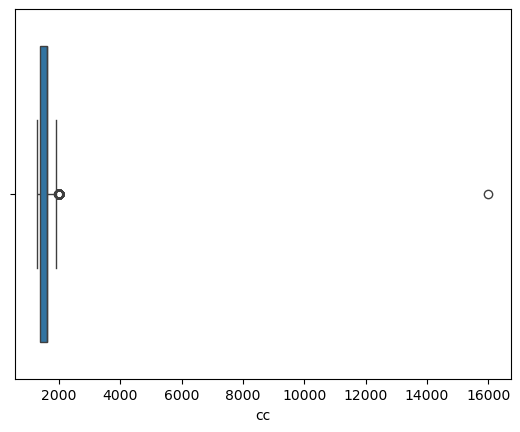

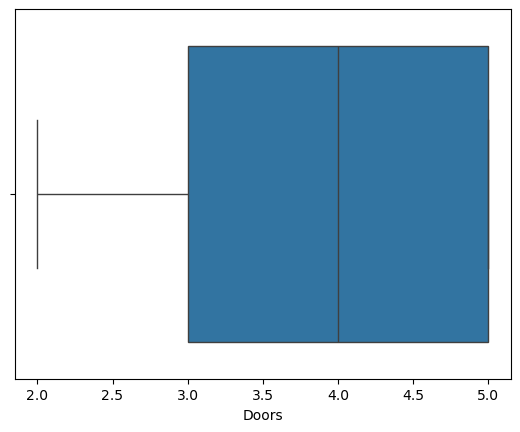

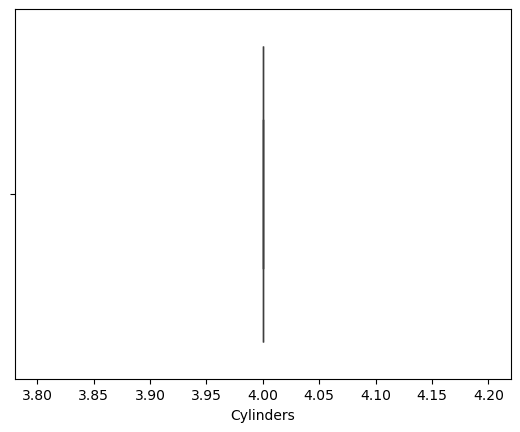

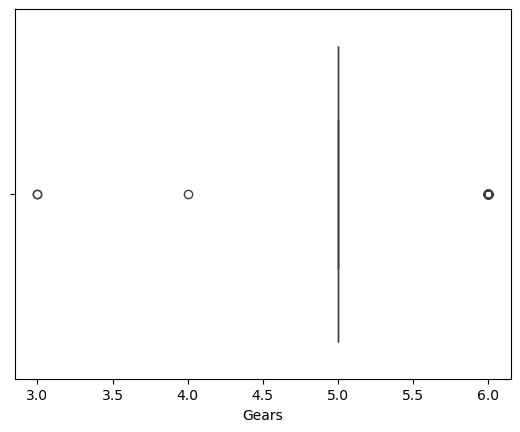

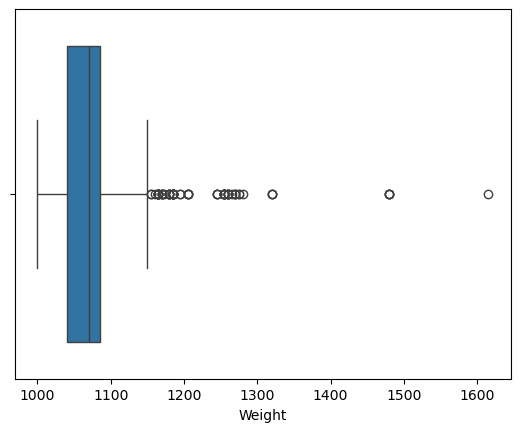

In [16]:
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [17]:
Q1=data['KM'].quantile(0.25)
Q3=data['KM'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

43000.0 87020.75 44020.75


In [18]:
lower_extreme=Q1-1.5*IQR
upper_extreme=Q3+1.5*IQR
print(lower_extreme,upper_extreme)

-23031.125 153051.875


In [19]:
df_salary_outliers=data[(data['KM']<lower_extreme) | (data['KM']>upper_extreme)]
df_salary_outliers                                                    

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,4,5,1110
187,9500,38,180638,Diesel,90,0,2000,4,4,5,1160
188,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
189,7750,43,178858,CNG,110,0,1600,3,4,5,1084
190,11950,40,161000,Diesel,69,0,1900,3,4,5,1105
191,4350,44,158320,Diesel,69,0,1800,5,4,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,4,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,4,5,1095
380,7000,53,176000,Diesel,69,0,1900,3,4,5,1105
381,7750,54,174139,Diesel,72,0,2000,4,4,5,1100


<Axes: >

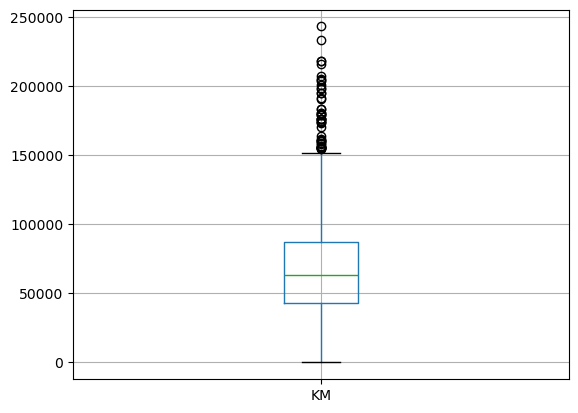

In [20]:
data.boxplot('KM')

In [21]:
df_no_outliers=data[(data['KM']>=lower_extreme) & (data['KM']<=upper_extreme)]

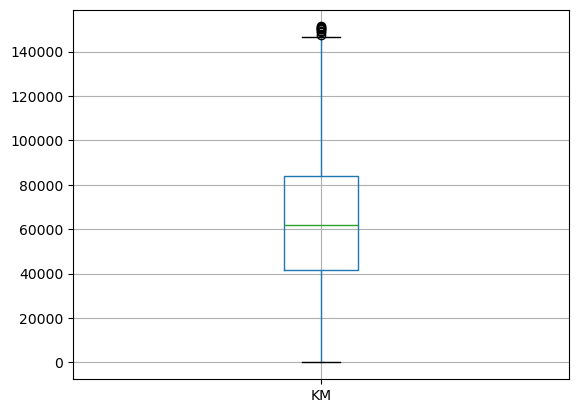

In [22]:
df_no_outliers.boxplot('KM')
plt.show()

In [23]:
df_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [24]:
target=data[['Price']]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [25]:
columns_to_drop=['Price','Cylinders']

In [26]:
features=data.drop(columns=columns_to_drop)
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,5,1165
1,23,72937,Diesel,90,0,2000,3,5,1165
2,24,41711,Diesel,90,0,2000,3,5,1165
3,26,48000,Diesel,90,0,2000,3,5,1165
4,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,5,1025
1432,72,19000,Petrol,86,0,1300,3,5,1015
1433,71,17016,Petrol,86,0,1300,3,5,1015
1434,70,16916,Petrol,86,0,1300,3,5,1015


In [27]:
ord_enc=OrdinalEncoder(categories=[['Diesel','Petrol','CNG']])

In [28]:
features['Fuel_Type']=ord_enc.fit_transform(features[['Fuel_Type']])

In [29]:
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,0.0,90,0,2000,3,5,1165
1,23,72937,0.0,90,0,2000,3,5,1165
2,24,41711,0.0,90,0,2000,3,5,1165
3,26,48000,0.0,90,0,2000,3,5,1165
4,30,38500,0.0,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,1.0,86,0,1300,3,5,1025
1432,72,19000,1.0,86,0,1300,3,5,1015
1433,71,17016,1.0,86,0,1300,3,5,1015
1434,70,16916,1.0,86,0,1300,3,5,1015


In [30]:
features.value_counts('Fuel_Type')

Fuel_Type
1.0    1264
0.0     155
2.0      17
Name: count, dtype: int64

In [31]:
correlation=features.corr()
correlation

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Age_08_04,1.000000,0.505672,0.091999,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,0.505672,1.000000,-0.329327,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
Fuel_Type,0.091999,-0.329327,1.000000,0.518078,0.079338,-0.303932,-0.020645,0.029474,-0.513035
HP,-0.156622,-0.333538,0.518078,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.031717,-0.081854,0.079338,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,-0.098084,0.102683,-0.303932,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,-0.148359,-0.036197,-0.020645,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,-0.005364,0.015023,0.029474,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,-0.470253,-0.028598,-0.513035,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


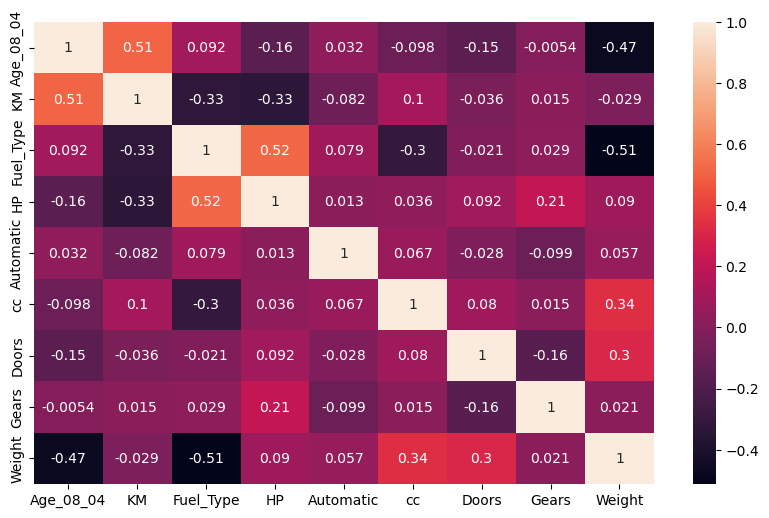

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [33]:
std_scaler=StandardScaler()

In [34]:
scaled_features=std_scaler.fit_transform(features)

In [35]:
features1=pd.DataFrame(scaled_features,columns=features.columns)
features1

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,-1.771966,-0.574695,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
1,-1.771966,0.117454,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
2,-1.718184,-0.715386,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
3,-1.610620,-0.547650,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
4,-1.395491,-0.801028,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883
1432,0.863362,-1.321120,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1433,0.809579,-1.374036,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1434,0.755797,-1.376703,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915


In [36]:
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [37]:
features1

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,-1.771966,-0.574695,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
1,-1.771966,0.117454,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
2,-1.718184,-0.715386,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
3,-1.610620,-0.547650,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
4,-1.395491,-0.801028,-2.718672,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883
1432,0.863362,-1.321120,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1433,0.809579,-1.374036,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1434,0.755797,-1.376703,0.289042,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915


In [38]:
x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.8,random_state=175)

## Multiple Linear Regression Model

In [39]:
multiple_reg=LinearRegression()

In [40]:
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [41]:
## Training Validation
y_pred=multiple_reg.predict(x_train)
y_pred

array([[11505.76843173],
       [12236.67567637],
       [12957.60025027],
       ...,
       [ 8816.60341197],
       [ 9529.80216508],
       [12855.08408024]])

In [42]:
## R2 Score
r2_score(y_train,y_pred)

0.8546626788738898

In [43]:
## Testing Validation
y_pred1=multiple_reg.predict(x_test)
y_pred1

array([[ 9243.14040123],
       [13091.75695235],
       [15915.83631927],
       [ 9418.68724458],
       [ 8859.48750276],
       [ 8245.60861468],
       [18751.17086513],
       [16140.0019549 ],
       [16340.88866119],
       [ 9066.72849369],
       [ 7280.92299201],
       [11468.21106345],
       [ 7036.27507406],
       [ 9406.02203731],
       [ 7375.37108053],
       [ 8346.49802748],
       [ 9655.21288456],
       [12465.52768832],
       [12748.82674777],
       [ 9991.88268786],
       [ 5640.86860648],
       [10334.2608396 ],
       [ 6393.24295276],
       [11396.22292892],
       [10525.49155825],
       [10391.57920871],
       [15620.13638849],
       [ 9469.11354661],
       [ 9157.98094179],
       [10440.95542721],
       [ 6256.25379314],
       [ 6286.45150463],
       [19759.0235222 ],
       [ 7315.67104252],
       [ 9203.79086613],
       [10764.34367314],
       [14537.88382198],
       [ 7075.9018968 ],
       [ 9184.23460386],
       [19163.51843518],


In [44]:
r2_score(y_test,y_pred1)

0.8890076113587018

## Lasso Model

In [46]:
from sklearn.linear_model import Lasso,Ridge

In [47]:
## Lasso Model
lasso=Lasso(alpha=1)

In [48]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [49]:
lasso_pred=lasso.predict(x_test)
lasso_pred

array([ 9243.72927273, 13091.87829086, 15912.32705881,  9418.72693843,
        8861.21421361,  8246.31357314, 18748.795559  , 16140.82830018,
       16341.61128882,  9069.58458358,  7283.37948722, 11468.55821203,
        7036.74961439,  9406.42334491,  7378.77222484,  8349.32131687,
        9656.89897139, 12465.65235552, 12742.18787604,  9992.63080059,
        5645.00419426, 10335.69156406,  6396.68269208, 11396.12855564,
       10524.91310057, 10391.06461538, 15621.2850226 ,  9468.85583552,
        9160.22252993, 10442.47256673,  6260.12836264,  6290.08676662,
       19741.55477322,  7317.07049776,  9204.22288278, 10765.90606886,
       14535.87782617,  7079.68595747,  9185.2474053 , 19162.43350901,
       16988.96511246,  8152.98790183,  9997.53336866,  7954.27813128,
       13109.79609578,  6019.46977308,  9841.31105528,  9878.91453311,
        7599.35386454, 11858.56754098,  7778.15827448, 12867.47384208,
        8245.41285535,  9389.21654368, 10036.01752658,  7867.69656017,
      

In [50]:
r2_score(y_test,lasso_pred)

0.888979233254046

## Ridge Model

In [51]:
## Ridge Model
ridge=Ridge(alpha=1)

In [52]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [53]:
ridge_pred=ridge.predict(x_test)
ridge_pred

array([[ 9244.46254986],
       [13089.19512938],
       [15916.91923384],
       [ 9420.13383171],
       [ 8861.56200719],
       [ 8247.87960357],
       [18746.24337423],
       [16135.61603079],
       [16336.44217082],
       [ 9066.47437016],
       [ 7282.47689878],
       [11465.75438012],
       [ 7038.70326993],
       [ 9407.17046101],
       [ 7376.48517396],
       [ 8347.5192957 ],
       [ 9656.07931996],
       [12463.93690739],
       [12747.01978314],
       [ 9991.15648073],
       [ 5642.98149572],
       [10335.3547087 ],
       [ 6395.87830488],
       [11395.72101467],
       [10526.72660336],
       [10391.67877983],
       [15615.76628804],
       [ 9470.91400931],
       [ 9156.31713843],
       [10439.40768863],
       [ 6257.63764901],
       [ 6288.75191801],
       [19754.79567111],
       [ 7318.00238678],
       [ 9204.56640447],
       [10764.38282549],
       [14536.22482713],
       [ 7076.50923082],
       [ 9184.54539396],
       [19157.54975784],


In [54]:
r2_score(y_test,ridge_pred)

0.8889623841266964

## Elastic Net Model

In [126]:
from sklearn.linear_model import ElasticNet

In [130]:
elastic_model=ElasticNet(alpha=1,l1_ratio=0.5)

In [132]:
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=1)

In [136]:
y_predict=elastic_model.predict(x_test)

In [138]:
y_predict

array([ 9722.34335973, 12326.97015381, 15320.26253594,  9900.7982512 ,
        9478.90917656,  8958.08370422, 16811.36984676, 14536.87652379,
       14699.53269843,  9165.55520889,  7992.42407359, 10901.07025547,
        7983.13003734,  9760.25473963,  7948.70079808,  8770.57197077,
        9951.03902355, 11885.61322458, 12152.38881435,  9932.67724712,
        6702.31214395, 10574.52244329,  7371.3411921 , 11183.34198654,
       10818.68959564, 10389.10397508, 14090.88837626, 10008.85101933,
        9017.21015816, 10143.853877  ,  7032.12475098,  7219.58776646,
       17835.84550274,  8164.40539908,  9595.94918109, 10758.26128379,
       13767.97535019,  7600.05419376,  9491.64652014, 16909.76768976,
       15461.53607566,  8603.74360297, 10072.01013499,  8067.45812301,
       12679.69082967,  6942.78094315, 10304.38675994, 10213.97385043,
        8272.90641263, 11262.61535031,  8663.2375393 , 12575.13286248,
        8621.56795171, 10273.59285567, 10460.82742889,  8613.52590283,
      

In [140]:
r2_score(y_test,y_predict)

0.8260888855829486

## Interview Questions

## What is Normalization & Standardization and how is it helpful?

##Normalization

Normalization: Normalization typically refers to the process of scaling data to fit within a specific range, usually [0, 1]. 

Normalization is useful when you want to ensure that all features contribute equally to the distance calculations, especially in algorithms that rely on distance metrics (e.g., K-nearest neighbors, neural networks).

##Standardization

Standardization, also known as z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1.

 Standardization is particularly beneficial when the data follows a Gaussian distribution or when using algorithms that assume normally distributed data (e.g., linear regression, logistic regression)

## What techniques can be used to address multicollinearity in multiple linear regression?

##Remove Highly Correlated Predictors

1.Identify Correlations: Use correlation matrices or variance inflation factor (VIF) to identify which variables are highly correlated.

 2.Drop Variables: Consider removing one of the correlated variables to reduce multicollinearity.